***1. Load the dataset***

In [72]:
dat <- read.csv("femaleMiceWeights.csv")

Reads the CSV file containing female mice bodyweights and diet types.
Creates a dataframe named `dat.`

***2. Load `dplyr` for data manipulation***

In [73]:
library(dplyr)

Imports functions like `filter()` and `select()` for cleaner data handling.

***3. Extract the control group (Diet = "chow")***

In [74]:
control <- filter(dat, Diet=="chow")
control <- select(control, Bodyweight)
unlist(control)

Bodyweight1  Bodyweight2  Bodyweight3  Bodyweight4  Bodyweight5  Bodyweight6 
       21.51        28.14        24.04        23.45        23.68        19.79 
 Bodyweight7  Bodyweight8  Bodyweight9 Bodyweight10 Bodyweight11 Bodyweight12 
       28.40        20.98        22.51        20.10        26.91        26.25

Keeps only rows with `"chow"` diet.
Selects the `Bodyweight` column.
Converts the one-column dataframe into a numeric vector for calculations.

***4. Same extraction using a pipeline (cleaner)***

In [75]:
control <- filter(dat, Diet=="chow") %>% 
  select(Bodyweight) %>% unlist

The same workflow as above, but written concisely.
Final output: numeric vector of chow group bodyweights.

***5. Extract the treatment group (Diet = "hf")***

In [76]:
treatment <- filter(dat, Diet=="hf") %>%
  select(Bodyweight) %>% unlist

Filters mice fed a high-fat diet.
Selects the `Bodyweight` column.
Converts to numeric vector.

***6. Compute the difference in means**

In [77]:
mean(treatment) - mean(control)

[1] 3.020833

Calculates observed difference between treatment and control.
Shows if treated mice weigh more or less.

***7. Store the observed difference***

In [78]:
obs <- mean(treatment) - mean(control)

Saves the observed value into a variable for later comparison against simulations.

***8. Load the population dataset for null distribution***

In [79]:
population <- read.csv("femaleControlsPopulation.csv")
population <- unlist( population )

Reads a population-level weight dataset (baseline).
Converts the single column to a numeric vector.
This acts as the "pool" for random sampling.

***9. Set number of simulations***

In [80]:
n <- 10000

You will simulate 10,000 random experiments to build a null distribution.

***10. Prepare a vector to store simulated mean differences***

In [81]:
nulls <- vector("numeric", n)

Allocates an empty numeric vector of length 10,000.
Each element will store one simulated mean difference.

***11. Run simulations to generate the null distribution***

In [82]:
for(i in 1:n){
   control <- sample(population, 12)
   treatment <- sample(population, 12)
   nulls[i] <- mean(treatment) - mean(control)
}

Inside each iteration:
Randomly select 12 bodyweights for “control” from the population.
Randomly select another 12 for “treatment”.
Compute the mean difference.
Store that difference in nulls[i].

This simulates experiments **assuming no real difference between diets**.

***12. Find the maximum simulated difference***

In [83]:
max(nulls)

[1] 5.855833

Returns the largest mean difference generated by random chance.
Helps you understand the range of the null distribution.

***13. Plot the distribution of simulated differences***

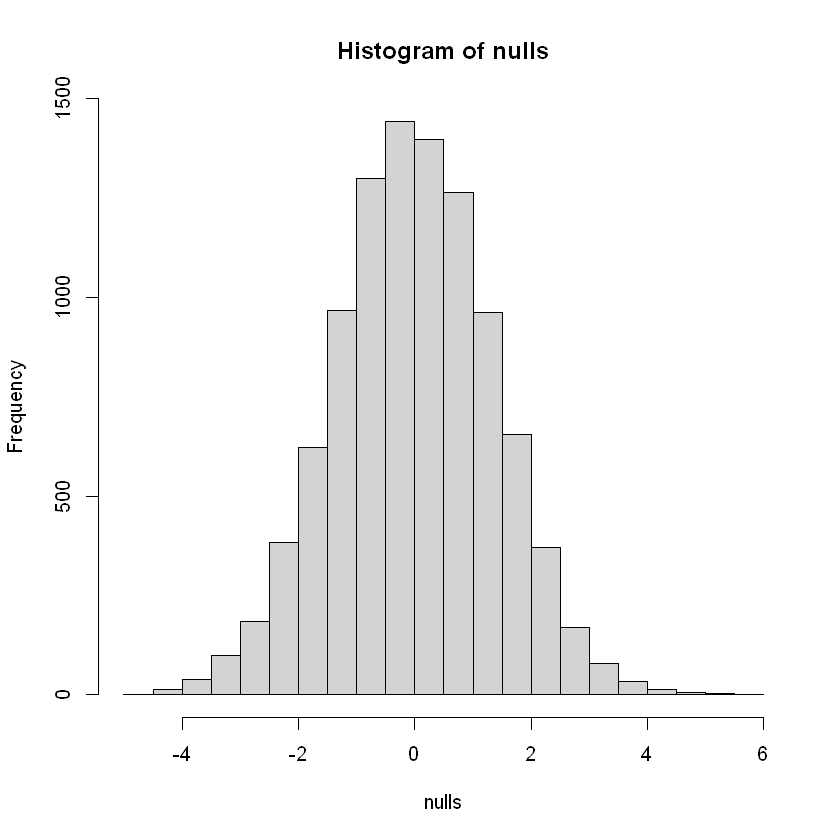

In [84]:
hist(nulls)

lots a histogram of all 10,000 simulated mean differences.
Shows how often differences occur just by randomness.
You compare this to your observed value `obs`.

***14. Compute one-sided p-value***

In [85]:
mean(nulls >= obs)

[1] 0.0126

Proportion of simulations where the random difference is **greater than or equal to** your observed difference.
This is the **one-tailed** p-value.

***15. Compute two-sided p-value***

In [86]:
mean(abs(nulls) > abs(obs))

[1] 0.0274

Proportion of simulated differences whose **absolute value** exceeds the observed.
This is the **two-tailed** p-value.
Used when you care about extreme differences in **either direction**.